## Dealing with missing Values

Many datasets you’ll deal with in your data science journey will have missing values. Let’s say our data frame has a missing value:

Missing Values: NaN, None, -, 0s , etc.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [3]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


#### Drop missing values

In [4]:
df.dropna()  #not inplace

,A,B,C
0,1.0,5.0,1


In [5]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [6]:
# along row
df.dropna()

,A,B,C
0,1.0,5.0,1


In [7]:
#same
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [8]:
# along column
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [9]:
# drop if more than 2 values are missing
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


#### Fill Value

In [10]:
df.fillna(value=2)

,A,B,C
0,1.0,5.0,1
1,2.0,2.0,2
2,2.0,2.0,3


In [11]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [12]:
# fill with mean
df['A'].mean()

1.5

In [13]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## Group By

The groupby method allows you to group rows of data together and call aggregate functions

In [41]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [42]:
df = pd.DataFrame(data)

In [16]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


**Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**


In [43]:
df.groupby('Company')

In [18]:
by_comp = df.groupby('Company')

In [19]:
by_comp

In [20]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [21]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [22]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [23]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [24]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [25]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [26]:
by_comp.describe().transpose()['FB']

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

## Example: Visual Guide

Recall: +NaN(2nd row)

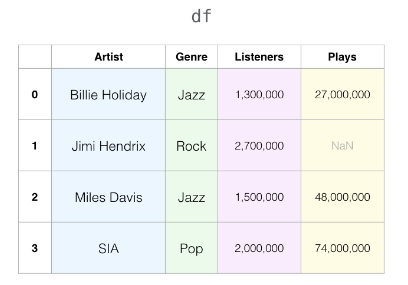

In [27]:
l = [["Billie Holiday",'Jazz',1300000,27000000],
    ['Jimi Hendrix','Rock',2700000,None],
    ['Miles Davis','Jazz',1500000,48000000],
    ['SIA','Pop',2000000,74000000]]

In [28]:
columns = ['Artist','Genre','Listeners','Plays']

In [29]:
df = pd.DataFrame(l,columns=columns)
df

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
1,Jimi Hendrix,Rock,2700000,NaN
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


Easy way out: remove the missing data

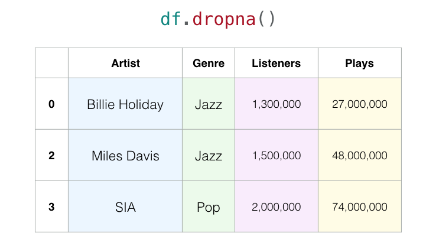

In [30]:
df.dropna()

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


### Grouping

Group our dataset by genre:

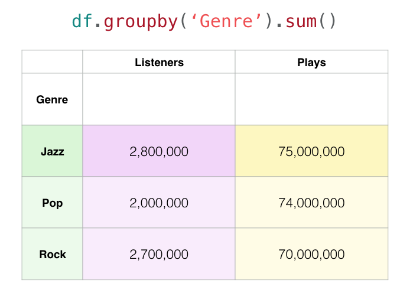

In [31]:
df.groupby('Genre').sum()

,Listeners,Plays
Genre,,
Jazz,2800000,75000000.0
Pop,2000000,74000000.0
Rock,2700000,0.0


In [32]:
df

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
1,Jimi Hendrix,Rock,2700000,NaN
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


In [33]:
df.fillna(70000000,inplace=True)

In [34]:
df

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000.0
1,Jimi Hendrix,Rock,2700000,70000000.0
2,Miles Davis,Jazz,1500000,48000000.0
3,SIA,Pop,2000000,74000000.0


### Create New column from existing column

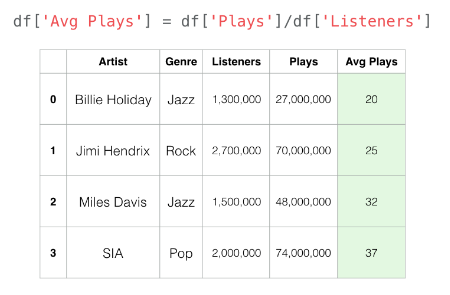

In [35]:
# find average number of plays for an artist
df['Avg Plays'] = df['Plays']/df['Listeners']

In [36]:
df

,Artist,Genre,Listeners,Plays,Avg Plays
0,Billie Holiday,Jazz,1300000,27000000.0,20.769231
1,Jimi Hendrix,Rock,2700000,70000000.0,25.925926
2,Miles Davis,Jazz,1500000,48000000.0,32.000000
3,SIA,Pop,2000000,74000000.0,37.000000
